In [1]:
import sklearn

import numpy as np
import os   

np.random.seed(42)

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist["data"], mnist["target"]

y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
# import time to time the evaluation of the models
import time

In [64]:
# run default svm
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print("SVM accuracy: ", accuracy_score(y_test, y_pred))

SVM accuracy:  0.9792


In [27]:
# lets write a function that will take in a model and time the fit and predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

class EvaluationResults:
    def __init__(self, accuracy, precision, recall, f1, fit_time, predict_time, classification):
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.f1 = f1
        self.fit_time = fit_time
        self.predict_time = predict_time
        self.classification = classification
        self.y_pred = None

def evaluateClassifier(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    half_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    fit_time = half_time - start_time
    predict_time = end_time - half_time
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    classification = classification_report(y_test, y_pred)
    results = EvaluationResults(accuracy, precision, recall, f1, fit_time, predict_time, classification)
    results.y_pred = y_pred
    return results


In [48]:
svm_clf_poly = SVC(kernel="poly", degree=7, C=45, coef0=2)
results_poly = evaluateClassifier(svm_clf_poly, X_train, y_train, X_test, y_test)

In [7]:
# we will skip the linear kernel as it did nit finish after hours
# svm_clf_linear = SVC(kernel="linear", C=10)
# svm_clf_linear.fit(X_train, y_train)
# y_pred_linear = svm_clf_linear.predict(X_test)

: 

: 

In [45]:
svm_clf_rbf = SVC(kernel="rbf", C=10, gamma="scale")
results_rbf = evaluateClassifier(svm_clf_rbf, X_train, y_train, X_test, y_test)

In [11]:
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
start_time_knn = time.time()
knn_clf.fit(X_train, y_train)
half_time_knn = time.time()
y_pred_knn = knn_clf.predict(X_test)
end_time_knn = time.time()
fit_time_knn = half_time_knn - start_time_knn
predict_time_knn = end_time_knn - half_time_knn

In [29]:
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
results_knn = evaluateClassifier(knn_clf, X_train, y_train, X_test, y_test)

In [28]:
rf_clf = RandomForestClassifier(n_estimators=100)
results_rf = evaluateClassifier(rf_clf, X_train, y_train, X_test, y_test)

In [30]:
sgd_clf = SGDClassifier(max_iter=1000,tol=1e-3)
results_sgd = evaluateClassifier(sgd_clf, X_train, y_train, X_test, y_test)

In [67]:
# print all results of knn
print(results_rbf.accuracy)   


0.9837


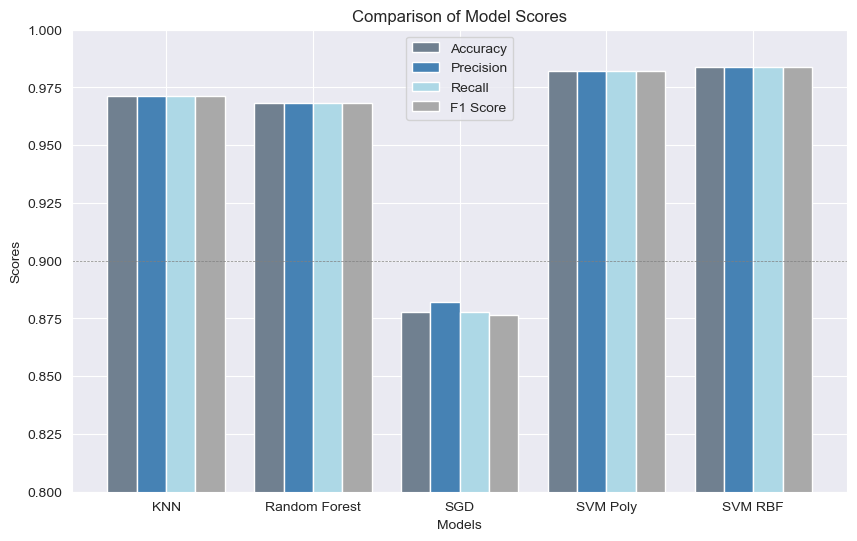

In [59]:
# Collecting all the results
models = ['KNN', 'Random Forest', 'SGD', 'SVM Poly', 'SVM RBF']
accuracies = [results_knn.accuracy, results_rf.accuracy, results_sgd.accuracy, results_poly.accuracy, results_rbf.accuracy]
precisions = [results_knn.precision, results_rf.precision, results_sgd.precision, results_poly.precision, results_rbf.precision]
recalls = [results_knn.recall, results_rf.recall, results_sgd.recall, results_poly.recall, results_rbf.recall]
f1_scores = [results_knn.f1, results_rf.f1, results_sgd.f1, results_poly.f1, results_rbf.f1]

# Setting up the bar width and positions
bar_width = 0.2
index = np.arange(len(models))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, accuracies, bar_width, label='Accuracy', color='slategray')
bar2 = ax.bar(index + bar_width, precisions, bar_width, label='Precision', color='steelblue')
bar3 = ax.bar(index + 2 * bar_width, recalls, bar_width, label='Recall', color='lightblue')
bar4 = ax.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score', color='darkgray')

# Adding vertical lines at each 0.1 step
for y in np.arange(0.1, 1.1, 0.1):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Scores')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models)
ax.legend()

# Set y-axis limits from 0.8 to 1
ax.set_ylim(0.8, 1)

# Display the plot
plt.show()


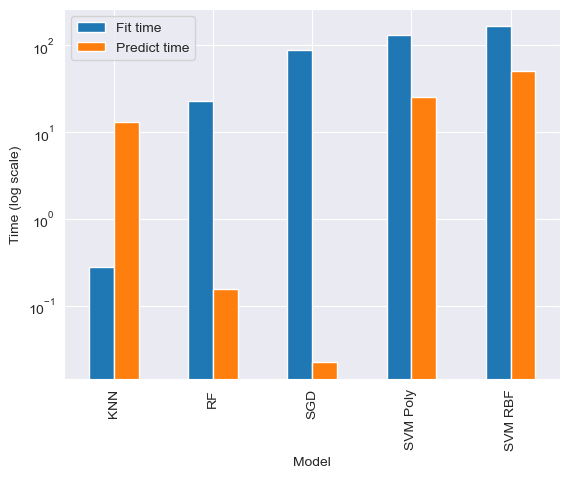

In [61]:
# visualize the fit and predict times for each model with logarithmic scale

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

# including poly and rbf kernel

fit_time = [results_knn.fit_time, results_rf.fit_time, results_sgd.fit_time, results_poly.fit_time, results_rbf.fit_time]
predict_time = [results_knn.predict_time, results_rf.predict_time, results_sgd.predict_time, results_poly.predict_time, results_rbf.predict_time]
model = ['KNN', 'RF', 'SGD', 'SVM Poly', 'SVM RBF']

df = pd.DataFrame({'Model': model, 'Fit time': fit_time, 'Predict time': predict_time})

ax = df.plot(x='Model', y=['Fit time', 'Predict time'], kind='bar', logy=True)
ax.set_ylabel('Time (log scale)')
plt.show()

In [63]:
def printResults(model):
    print("accuracy: ", model.accuracy)
    print("precision: ", model.precision)
    print("recall: ", model.recall)
    print("f1: ", model.f1)
    print("fit time: ", model.fit_time)
    print("predict time: ", model.predict_time)

print("knn")
printResults(results_knn)
print("rf")
printResults(results_rf)
print("sgd")
printResults(results_sgd)
print("poly")
printResults(results_poly)
print("rbf")
printResults(results_rbf)

knn
accuracy:  0.9714
precision:  0.9715166824529755
recall:  0.9714
f1:  0.9713597782738583
fit time:  0.2816150188446045
predict time:  13.060917139053345
rf
accuracy:  0.9683
precision:  0.9683073256668767
recall:  0.9683
f1:  0.9682778189614272
fit time:  23.169502019882202
predict time:  0.15563488006591797
sgd
accuracy:  0.878
precision:  0.8820906313453429
recall:  0.878
f1:  0.876344951884157
fit time:  88.74040389060974
predict time:  0.022403955459594727
poly
accuracy:  0.9822
precision:  0.9822016912616657
recall:  0.9822
f1:  0.9821912964712863
fit time:  132.45645713806152
predict time:  25.622342109680176
rbf
accuracy:  0.9837
precision:  0.9837053906264326
recall:  0.9837
f1:  0.9836954484859449
fit time:  166.39090394973755
predict time:  50.24543786048889
